# RRN, LSTM & GRU Model

- Newyork Taxi Dataset

In [1]:
'''The taxi dataset consists of records containing information about taxi trips, such as vendor IDs, 
pickup and dropoff datetimes, passenger counts, and geographic coordinates (longitude and latitude) for both pickup 
and dropoff locations. Additionally, the dataset includes a "store_and_fwd_flag" indicating whether 
the trip data was stored in the vehicle before forwarding. This dataset is typically used for tasks 
like predicting trip duration or analyzing taxi ride patterns.'''

'The taxi dataset consists of records containing information about taxi trips, such as vendor IDs, \npickup and dropoff datetimes, passenger counts, and geographic coordinates (longitude and latitude) for both pickup \nand dropoff locations. Additionally, the dataset includes a "store_and_fwd_flag" indicating whether \nthe trip data was stored in the vehicle before forwarding. This dataset is typically used for tasks \nlike predicting trip duration or analyzing taxi ride patterns.'

### Step 1: Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

### Step 2: Data Preparation

In [3]:
df = pd.read_csv("ny_taxi_data.csv")
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N
...,...,...,...,...,...,...,...,...,...,...
16095,id1197632,1,27-05-2016 09:38,27-05-2016 09:48,1,-73.940025,40.751556,-73.970116,40.754772,N
16096,id3503918,2,07-01-2016 20:42,07-01-2016 20:55,1,-73.963051,40.799149,-73.953934,40.766590,N
16097,id2857349,1,10-01-2016 15:41,10-01-2016 15:47,1,-73.912605,40.774769,-73.922478,40.765701,N
16098,id3803774,1,20-01-2016 16:25,20-01-2016 16:37,1,-73.983444,40.755722,-73.978958,40.782188,N


In [4]:
df["passenger_count"].value_counts()

passenger_count
1    11371
2     2357
5      866
3      638
6      541
4      327
Name: count, dtype: int64

In [5]:
# Assuming you want to predict the 'passenger_count'

data = df["passenger_count"].values
data

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Step 3: Data Preprocessing

In [6]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

sequence_length = 5  # Adjust this as needed
sequences = []
targets = []

for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [7]:
targets

array([[1. ],
       [0.6],
       [0. ],
       ...,
       [0. ],
       [0. ],
       [0. ]])

Example:

If data = [0.5, 0.6, 0.4, 0.3, 0.8, 0.7, 0.9], with sequence_length = 5, you will get:
sequences = [[0.5, 0.6, 0.4, 0.3, 0.8], [0.6, 0.4, 0.3, 0.8, 0.7]]
targets = [0.7, 0.9]
In this case:

The first sequence [0.5, 0.6, 0.4, 0.3, 0.8] has a target 0.7.
The second sequence [0.6, 0.4, 0.3, 0.8, 0.7] has a target 0.9.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

### Step 4: Build and Train RNN Model

In [9]:
print(X_train.shape)

(12876, 5, 1)


In [10]:
model_rnn = keras.Sequential(name="RNN")
model_rnn.add(keras.layers.SimpleRNN(256, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Admin\anaconda3\envs\mlenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
from tensorflow.keras import layers, models

model_rnn = models.Sequential(name="RNN")
model_rnn.add(layers.SimpleRNN(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(layers.SimpleRNN(50, activation='relu'))
model_rnn.add(layers.Dense(64, activation='relu'))
model_rnn.add(layers.Dropout(0.3))
model_rnn.add(layers.Dense(32, activation='relu'))
model_rnn.add(layers.Dense(1))
model_rnn.compile(optimizer='RMSprop', loss='mean_squared_error')


In [12]:
model_rnn.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0734
Epoch 2/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0721
Epoch 3/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0757
Epoch 4/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0711
Epoch 5/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0692
Epoch 6/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0692
Epoch 7/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0707
Epoch 8/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0686
Epoch 9/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0710
Epoch 10/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0708


### Step 5: Build and Train LSTM Model

In [13]:
model_lstm = keras.Sequential(name="LSTM")
model_lstm.add(keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0737
Epoch 2/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0719
Epoch 3/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0701
Epoch 4/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0703
Epoch 5/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0702
Epoch 6/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0723
Epoch 7/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0703
Epoch 8/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0693
Epoch 9/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0725
Epoch 10/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0689
Epoch 11/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0698
Epoch 12/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0687
Epoch 13/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0705
Epoch 14/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0699
Epoch 15/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1

### Step 6: Build and Train GRU Model

In [15]:
model_gru = keras.Sequential(name="GRU")
model_gru.add(keras.layers.GRU(100, activation='tanh', input_shape=(X_train.shape[1], 1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model_gru.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0735
Epoch 2/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0694
Epoch 3/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0705
Epoch 4/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0718
Epoch 5/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0700
Epoch 6/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0687
Epoch 7/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0701
Epoch 8/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0708
Epoch 9/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0705
Epoch 10/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0713


### Step 7: Evaluate the models

In [17]:
print(X_test.shape)

(3219, 5, 1)


In [18]:
def evaluate_model(model, X_test, y_test):
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_pred = model.predict(X_test_reshaped)
    # print(y_pred)
    y_pred = scaler.inverse_transform(y_pred).flatten()
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_rnn = evaluate_model(model_rnn, X_test, y_test)
mse_lstm = evaluate_model(model_lstm, X_test, y_test)
mse_gru = evaluate_model(model_gru, X_test, y_test)

print(f"RNN Mean Squared Error: {mse_rnn}")
print(f"LSTM Mean Squared Error: {mse_lstm}")
print(f"GRU Mean Squared Error: {mse_gru}")

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RNN Mean Squared Error: 1.6957568998352417
LSTM Mean Squared Error: 1.6706775264131788
GRU Mean Squared Error: 1.6775813649155122


### Step 8: Visualization

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


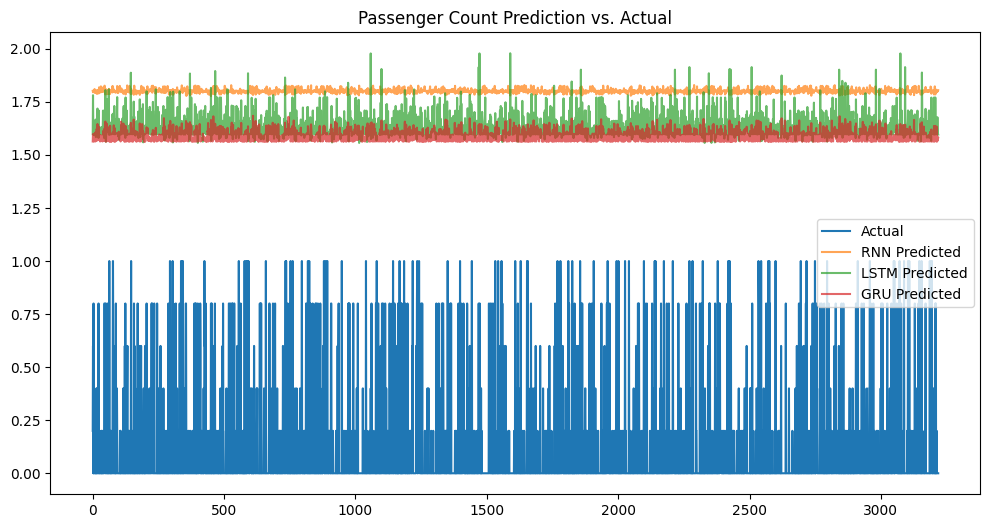

In [19]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('Passenger Count Prediction vs. Actual')
plt.show()